In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score

from scipy.cluster.hierarchy import linkage, dendrogram

np.set_printoptions(suppress=True, precision=5)


%matplotlib inline

In [2]:
X, y = make_blobs(n_samples = 150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

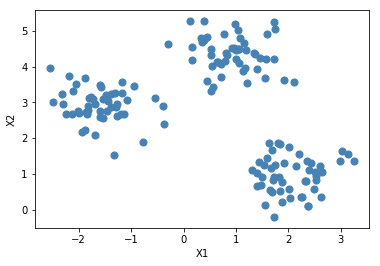

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = "steelblue", marker = "o", s = 50)
plt.xlabel("X1")
plt.ylabel("X2")

In [4]:
km = KMeans(n_clusters=3, init="random", n_init = 10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)

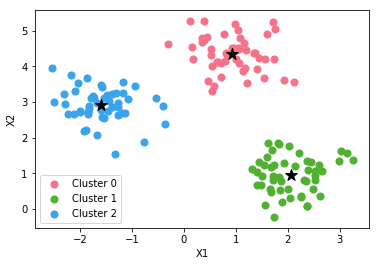

In [5]:
def show_cluster(X, y, estimator = None, ignore_noise = True):
    levels = set(y)
    
    if ignore_noise and -1 in levels:
        levels.remove(-1)
    
    colors = sns.color_palette("husl", len(levels))
    centroids = None 
    if estimator is not None and hasattr(estimator, "cluster_centers_"):
        centroids = estimator.cluster_centers_  

    for k in levels:
        data = X[y == k, :]
        plt.scatter(data[:, 0], data[:, 1], color = colors[k], s = 50, label = "Cluster %s" % k)

    if not centroids is None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color = "black", marker = "*", s = 150)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend(loc = "lower left")
    
show_cluster(X, y_km, km)

In [6]:
km.cluster_centers_

array([[ 0.93297,  4.35421],
       [ 2.06522,  0.96137],
       [-1.59473,  2.92237]])

In [7]:
#Sum of distances of samples to their closest cluster center.
print("Distortion (Within Cluster SSE): %.2f" % km.inertia_)

Distortion (Within Cluster SSE): 72.48


In [8]:
#Sum of distances of samples to their closest cluster center.
homogeneity_score(y, y_km)

1.0

Homogeneity score:  0.681219069709 Inertia:  262.720465653


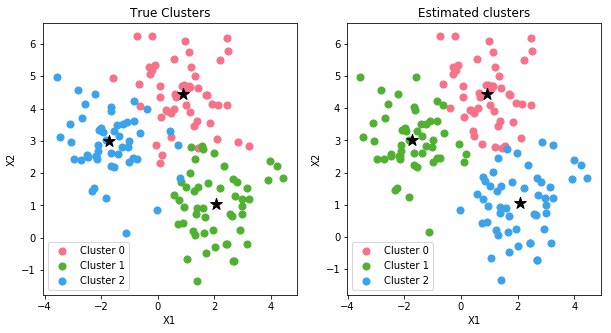

In [9]:
X, y = make_blobs(n_samples = 150, n_features=2, centers=3, cluster_std=1.0, shuffle=True, random_state=0)
km = KMeans(n_clusters=3, init="random", n_init = 10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
print("Homogeneity score: ", homogeneity_score(y, y_km), "Inertia: ", km.inertia_)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X, y, km)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X, y_km, km)
plt.title("Estimated clusters")

# Find optimal number of clusters using elbow method

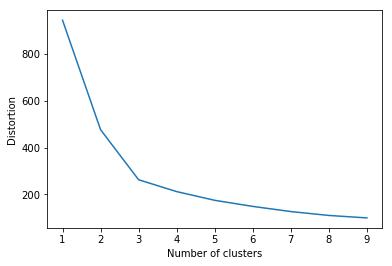

In [10]:
def find_elbow(X, n = 10):
    distortions = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0, init="k-means++")
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1, n), distortions)
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")

find_elbow(X)

## Find number of clusters from Dendogram

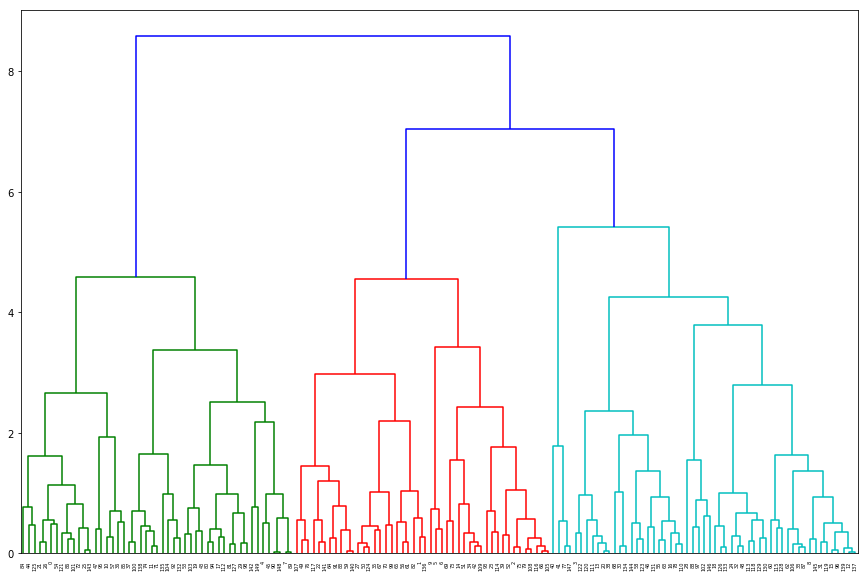

In [11]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X, method="complete", metric="euclidean")
f = dendrogram(row_clusters)

# Half Moon Dataset and DBSCAN

In [12]:
from sklearn.datasets import make_moons

In [13]:
X, y = make_moons(n_samples=200, noise=0.09, random_state=0)

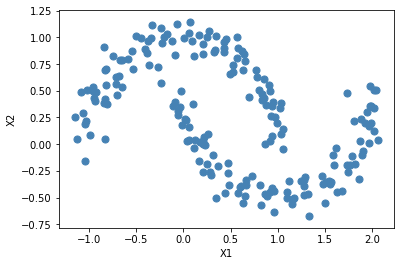

In [14]:
plt.scatter(X[:, 0], X[:, 1], c = "steelblue", marker = "o", s = 50)
plt.xlabel("X1")
plt.ylabel("X2")

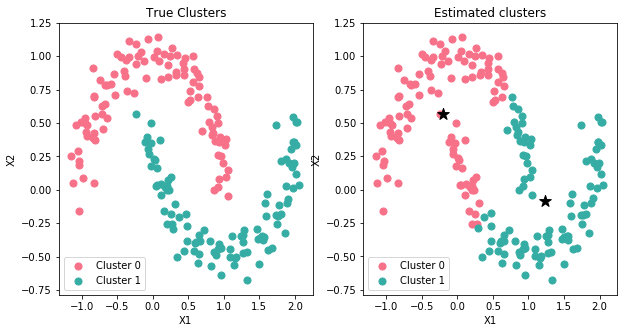

In [15]:
km = KMeans(n_clusters=2, init="random", n_init = 10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
#show_cluster(km, X, y_km)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X, y)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X, y_km, km)
plt.title("Estimated clusters")

In [16]:
homogeneity_score(y, y_km)

0.18109823201826031

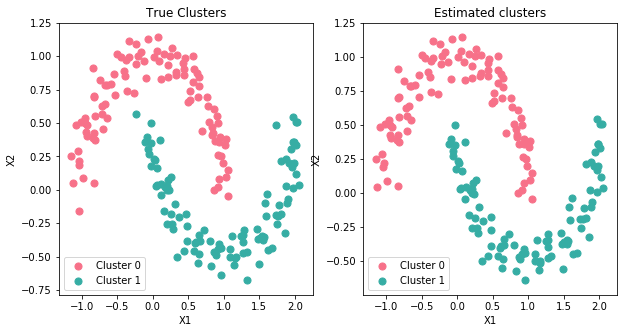

In [17]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
y_db = dbscan.fit_predict(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X, y, dbscan)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X, y_db, dbscan)
plt.title("Estimated clusters")

In [18]:
labels = set(y_db)
if -1 in labels: #Noise
    labels.remove(-1)
print("No of clusters: ", len(labels))

No of clusters:  2


In [19]:
homogeneity_score(y, y_db)

0.98377443751081795

# Applying clustering to grouplens movies dataset based on genre

In [20]:
movies = pd.read_csv("data/ml-latest-small/movies.csv", index_col="movieId")
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [21]:
movies.sample(10)

,title,genres
movieId,,
767,"Grass Harp, The (1995)",Comedy|Drama
6774,Videodrome (1983),Fantasy|Horror|Sci-Fi|Thriller
6154,Deliver Us from Eva (2003),Comedy|Romance
45440,Art School Confidential (2006),Comedy|Drama
4343,Evolution (2001),Comedy|Sci-Fi
47815,Crossover (2006),Action|Drama
2438,Outside Ozona (1998),Comedy|Drama|Thriller
1627,U Turn (1997),Crime|Drama|Mystery
1181,"Shooter, The (1997)",Western


In [22]:
movies = movies[~movies["genres"].str.contains("\(no genres listed\)")]
movies.sample(10)

,title,genres
movieId,,
4024,"House of Mirth, The (2000)",Romance
3839,Phantasm IV: Oblivion (1998),Horror
2648,Frankenstein (1931),Drama|Horror|Sci-Fi
6813,"Ghost and Mr. Chicken, The (1966)",Comedy|Romance
3753,"Patriot, The (2000)",Action|Drama|War
105593,Filth (2013),Comedy|Crime|Drama
4649,Wet Hot American Summer (2001),Comedy
1649,"Fast, Cheap & Out of Control (1997)",Documentary
4612,Jesus of Montreal (Jésus de Montréal) (1989),Drama


In [23]:
genres = set()
movies["genres"].apply(lambda g: genres.update(g.split(r"|")))
genres = list(genres)
genres.sort()
print(genres, len(genres))

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 19


In [24]:
def to_vector(g):
    indices = np.array([genres.index(v) for v in g.split(r"|")])
    l = np.zeros(len(genres))
    l[indices] = 1
    return l

genres_idx = movies["genres"].apply(to_vector)
genres_idx.head(10)

movieId
1     [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
2     [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
3     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
5     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
6     [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
7     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
8     [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: genres, dtype: object

In [25]:
X = np.array(genres_idx.tolist())
print("X.shape: ", X.shape)

X.shape:  (9107, 19)


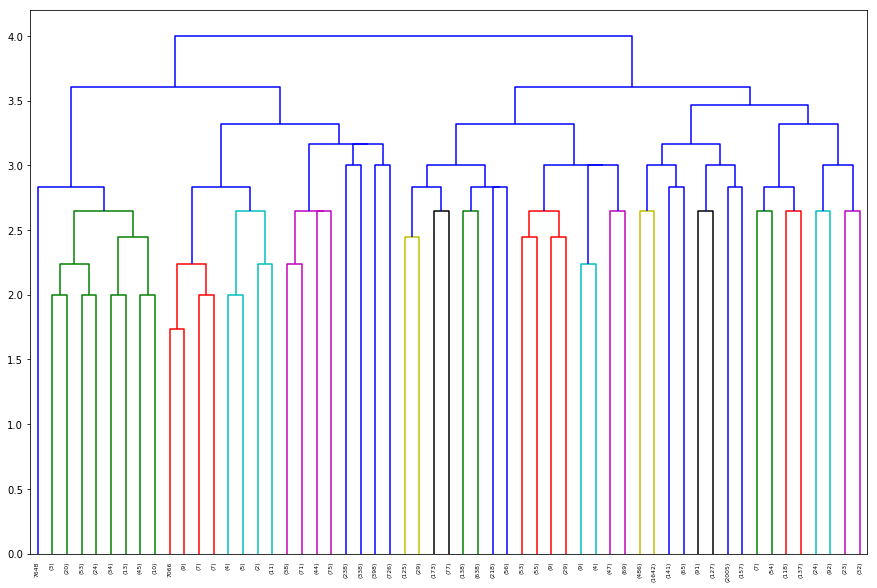

In [26]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X, method="complete", metric="euclidean")
f = dendrogram(row_clusters, p = 5, truncate_mode="level")

In [27]:
from sklearn.decomposition import KernelPCA, PCA

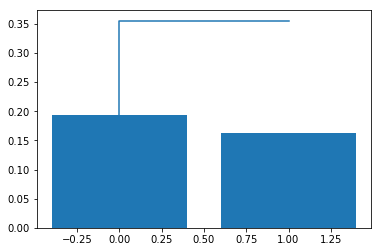

In [28]:
pca = PCA(n_components = 2, random_state=0)
X_pca = pca.fit_transform(X)

ratios = pca.explained_variance_ratio_
plt.bar(range(len(ratios)), ratios)
plt.step(range(len(ratios)), np.cumsum(ratios), label = "Cumsum of Explained variance ratio")

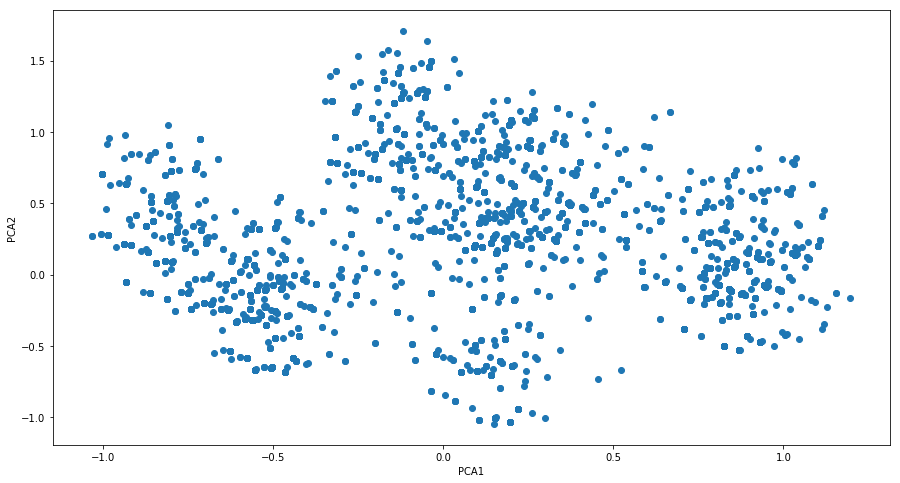

In [29]:
plt.figure(figsize = (15, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PCA1")
plt.ylabel("PCA2")

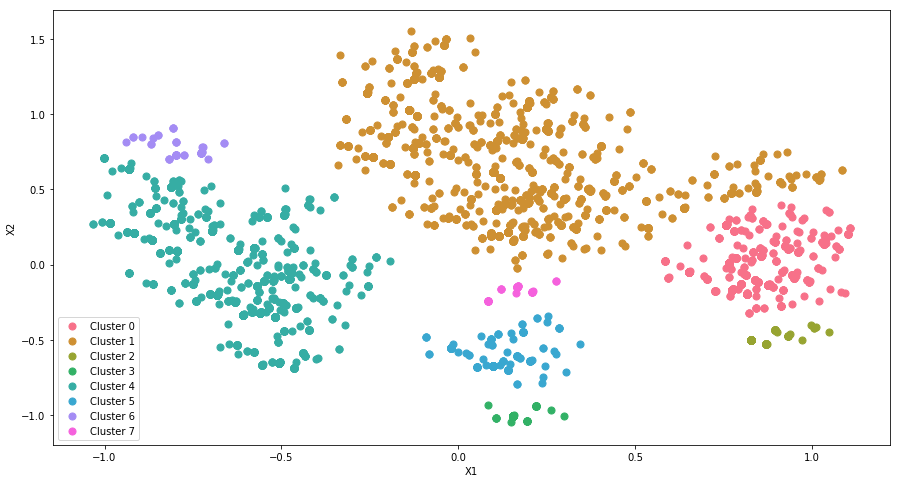

In [37]:
dbscan = DBSCAN(eps=0.1, min_samples=15, metric="euclidean")
y_db = dbscan.fit_predict(X_pca)
plt.figure(figsize = (15, 8))
show_cluster(X_pca, y_db, dbscan)

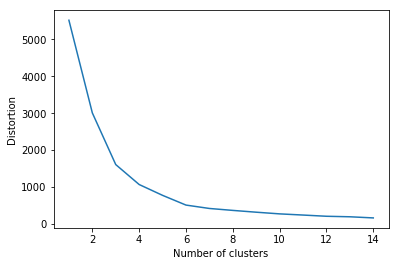

In [31]:
find_elbow(X_pca, 15)

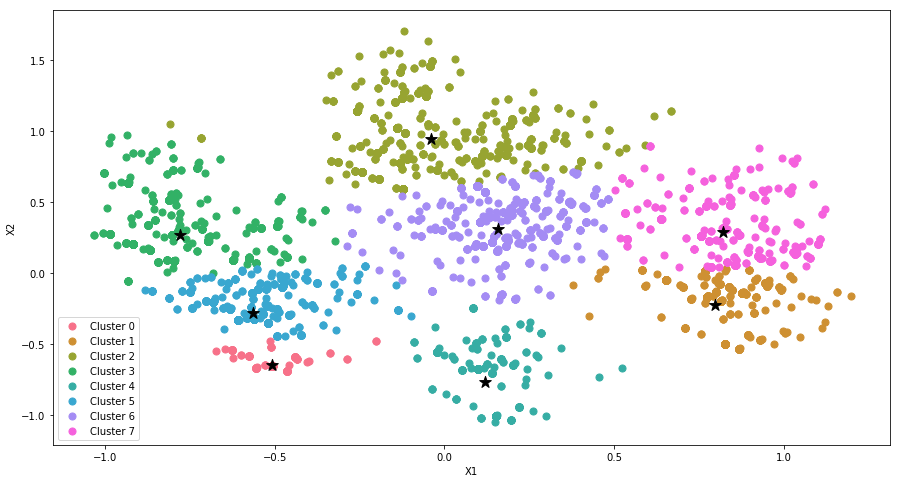

In [38]:
knn = KMeans(n_clusters=8, max_iter=300, random_state=0)
y_pred = knn.fit_predict(X_pca)
plt.figure(figsize = (15, 8))
show_cluster(X_pca, y_pred, knn)

In [34]:
movies[y_pred == 3]

,title,genres
movieId,,
22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
42,Dead Presidents (1995),Action|Crime|Drama
61,Eye for an Eye (1996),Drama|Thriller
78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
79,"Juror, The (1996)",Drama|Thriller
86,White Squall (1996),Action|Adventure|Drama
92,Mary Reilly (1996),Drama|Horror|Thriller
100,City Hall (1996),Drama|Thriller


In [35]:
movies[y_pred == 5]

,title,genres
movieId,,
14,Nixon (1995),Drama
16,Casino (1995),Crime|Drama
24,Powder (1995),Drama|Sci-Fi
26,Othello (1995),Drama
27,Now and Then (1995),Children|Drama
30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
31,Dangerous Minds (1995),Drama
34,Babe (1995),Children|Drama
36,Dead Man Walking (1995),Crime|Drama


In [36]:
movies[y_pred == 2]

,title,genres
movieId,,
6,Heat (1995),Action|Crime|Thriller
10,GoldenEye (1995),Action|Adventure|Thriller
23,Assassins (1995),Action|Crime|Thriller
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
44,Mortal Kombat (1995),Action|Adventure|Fantasy
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller


In [43]:
knn = KMeans(n_clusters=8, max_iter=300, random_state=0)
y_pred = knn.fit_predict(X)
movies[y_pred == 2]

,title,genres
movieId,,
14,Nixon (1995),Drama
16,Casino (1995),Crime|Drama
17,Sense and Sensibility (1995),Drama|Romance
24,Powder (1995),Drama|Sci-Fi
25,Leaving Las Vegas (1995),Drama|Romance
26,Othello (1995),Drama
27,Now and Then (1995),Children|Drama
28,Persuasion (1995),Drama|Romance
29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
